In [2]:
# Расчёт датчика тока по выходному плечу.
# Необходимо учесть, дабы напряжение с делителя не превысело минимальное напряжение после шунта. И ограничить коэффициент усиления.
# Эти меры позволят реализовать максимальный динамический диапазон на выходе датчика и исключить насыщение усилителя.

# Расчёт коэффициента деления Кдел и коэффициента усиления Кус.
# Для этого определяем минимальное напряжение питания Uпит и вычисляем Кдел для максимального тока нагрузки Iн, затем вычисляем Кус для минимального Uпит и Iн = 0

Rshunt = .1 # шунт, Ом
Il = 3.0 # максимальный ток нагрузки Iн
Upower = (7.2, 6.4, 5.6) # напряжение питания Uпит, В

Kdiv = (min(Upower) - Rshunt * Il) / min(Upower)
Gain = (min(Upower) * Kdiv) / (min(Upower) * (1 - Kdiv)) # Кус = Uвых / Uвх. "-" Кус инвертирующего усилителя игнорируем

print u'Напряжение питания Uпит, В: {0:.1f} +/-{1:.1f}\nТок Iн, А: 0..{3:.1f}\nШунт, Ом: {2:.2f}\n'.format((max(Upower) + min(Upower)) / 2, (max(Upower) - min(Upower)) / 2, Rshunt, Il)
print u'Коэффициент деления Кдел: {0:.3f}\nКоэффициент усиления Кус: {1:.2f}'.format(Kdiv, Gain)

Напряжение питания Uпит, В: 6.4 +/-0.8
Ток Iн, А: 0..3.0
Шунт, Ом: 0.10

Коэффициент деления Кдел: 0.946
Коэффициент усиления Кус: 17.67


In [3]:
%pylab inline
plt.rcParams[u'mathtext.it'] = u'Arial:italic'
plt.rcParams[u'font.family'] = u'Arial'
plt.rcParams[u'text.color'] = u'black'
plt.rcParams[u'axes.labelcolor'] = u'(.65,.65,.65)'
plt.rcParams[u'axes.edgecolor'] = u'(.3,.3,.3)'
plt.rcParams[u'axes.facecolor'] = u'(.65,.65,.65)'
plt.rcParams[u'grid.color'] = u'black'
plt.rcParams[u'xtick.color'] = u'(.65,.65,.65)'
plt.rcParams[u'ytick.color'] = u'(.65,.65,.65)'
plt.rcParams[u'legend.edgecolor'] = u'black'
plt.rcParams[u'legend.facecolor'] = u'(.5,.5,.5)'
plt.rcParams[u'axes.titlesize'] = 24
plt.rcParams[u'axes.labelsize'] = 20
plt.rcParams[u'font.size'] = 14

Populating the interactive namespace from numpy and matplotlib


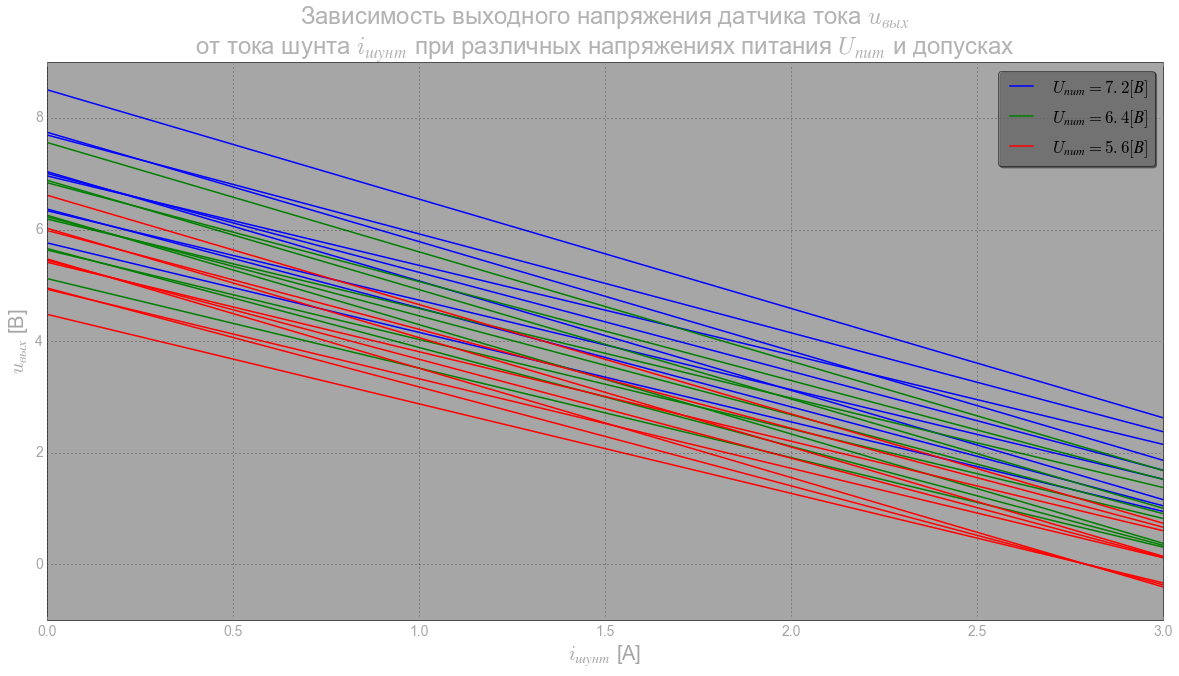

In [7]:
#Kdiv = [0.9397, 0.9451, 0.9501]# [Кдел.мин, Кдел, Кдел.макс], R1 3.6 кОм, R2 62.0 кОм, 5.0%
Kdiv = [0.9441, 0.9451, 0.9462]# [Кдел.мин, Кдел, Кдел.макс], R1 3.6 кОм, R2 62.0 кОм, 1.0%
#Gain = [16.039, 17.727, 19.593]# [Кус.мин, Кус, Кус.макс], R1 2.2 кОм, R2 39.0 кОм, 5.0%
Gain = [17.376, 17.727, 18.085]# [Кус.мин, Кус, Кус.макс], R1 2.2 кОм, R2 39.0 кОм, 1.0%

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate

def Ui(Ushunt=0.0, i=0.0, k_div=Kdiv, gain=Gain, Rshunt=0.1):
    return (Ushunt - Ushunt * k_div - i * Rshunt) * gain

# -*- coding: utf-8 -*-

ii=np.linspace(0, 3.0, 500)
plt.gcf().set_size_inches(20,10)
legeng_lines = []
for u_power, prop in zip(Upower, plt.rcParams['axes.prop_cycle']):
    legend_added = False
    for k_div in Kdiv:
        for gain in Gain:
            line = plt.plot(ii, Ui(u_power, ii, k_div, gain), prop[u'color'], linewidth=1.5, label=u'$U_{{пит}}={0}[В]$'.format(u_power))
            if not legend_added:
                legend_added = True
                legeng_lines += [line[0], line[0].get_label()]
plt.ylabel(u'$u_{вых}$ [В]')
plt.xlabel(u'$i_{шунт}$ [A]')
plt.grid(True)
plt.legend(legeng_lines[::2], legeng_lines[1::2], loc='upper right', shadow=True, fancybox=True, framealpha=.5)
plt.title(u'Зависимость выходного напряжения датчика тока $u_{вых}$\nот тока шунта $i_{шунт}$ при различных напряжениях питания $U_{{пит}}$ и допусках', color=(.7,.7,.7))
plt.show()

In [ ]:
plt.gca().get_yticks()